<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#006a79; font-size:40px; text-align:center'>Time Series Analysis Procedure in Python – Work Book</h1>
</div>

__<p style='text-align:center'>Copyright (©) Machine Learning Plus. All Rights Reserved.</p>__

__Table of Contents__
1. What is a Time series and why is it important?
2. Examples of Real world Time Series data that matters. 
3. Why Analyzing Time series matters and a must have skill for Data / ML Scientists?
4. Sources of Time Series Data
5. Types of Time series Data
6. Concepts and Hands-On Starts. . .

__Pre-Requisites:__
1. Python Basics for doing hands on
2. Pandas - good to have. Easy to follow, nevertheless.

## What is a Time Series?

Time series is a sequence of observations recorded at regular time intervals.

Depending on the frequency of observations, a time series may typically be hourly, daily, weekly, monthly, quarterly and annual. Sometimes, you might have seconds and minute-wise time series as well, like, number of clicks and user visits every minute etc.

## Examples of Time Series in the Real World that matter?

1. Stock market prices
2. Demand and Sales Data of various products
3. Website / Store traffic data
4. Weather data
5. Electicity Consumption data
6. Crop Production
7. Macro Economic indices (Interest rate, Gold Price, Crude Oil price, Consumer Price Index (CPI), Whole Sale Price Index (WPI) etc).

## Why Analyzing Time series matters and a must have skill for Data / ML Scientists?

Because it is the preparatory step before you develop a forecast of the series.

Besides, time series forecasting has enormous commercial significance because stuff that is important to a business like demand and sales, number of visitors to a website, stock price etc are essentially time series data.

In order for the business to plan their operations, an accurate forecast of the product demand is necessary. __Being able to analyse Time Series data and scientifically forecast the product demand, forecast expected spike / fall in demand for various promotional / catastrophic events and assigning causality to it is an essential and highly valuable skill Data Scientists are expected to possess.__

## Sources of Time Series Data

1. Proprietary (sales data, product demand, etc)
2. Website Traffic (google, SEO providers)
3. Macro Economic data (World Bank, Gov orgs country specific)

- [Economic Data Sources from University of Minnesota](https://libguides.umn.edu/c.php?g=843682&p=6527336)
- [75 Sources of Macro Economic Data](https://library.law.yale.edu/news/75-sources-economic-data-statistics-reports-and-commentary)
- [FRED](https://fred.stlouisfed.org/), [Bureau of Labour Statistic BLS](https://www.bls.gov/)
- [IHS Markit](https://news.ihsmarkit.com/)

## Types of Time Series Data

1. Univariate Time Series
2. Panel Data

The series may also be categorised based on the frequency of the data: sec, min, hour, days, week, months, quarter, years.

## __How to import time series in python?__

Most common method is to simply use the pandas library

In [1]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})
import warnings
warnings.filterwarnings('ignore')


# Import as Dataframe: Australian Drug Sales
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


__Import it as a series__

In [2]:
ser = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
ser.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


__Example of Panel Data__

In [3]:
# dataset source: https://github.com/rouseguy
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/MarketArrivals.csv')
df = df.loc[df.market=='MUMBAI', :]
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
6654,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,January-2004
6655,MUMBAI,January,2005,275845,261,513,387,MS,MUMBAI,January-2005
6656,MUMBAI,January,2006,228000,315,488,402,MS,MUMBAI,January-2006
6657,MUMBAI,January,2007,205200,866,1136,997,MS,MUMBAI,January-2007
6658,MUMBAI,January,2008,267550,348,550,448,MS,MUMBAI,January-2008


## __Visualizing a Time Series__

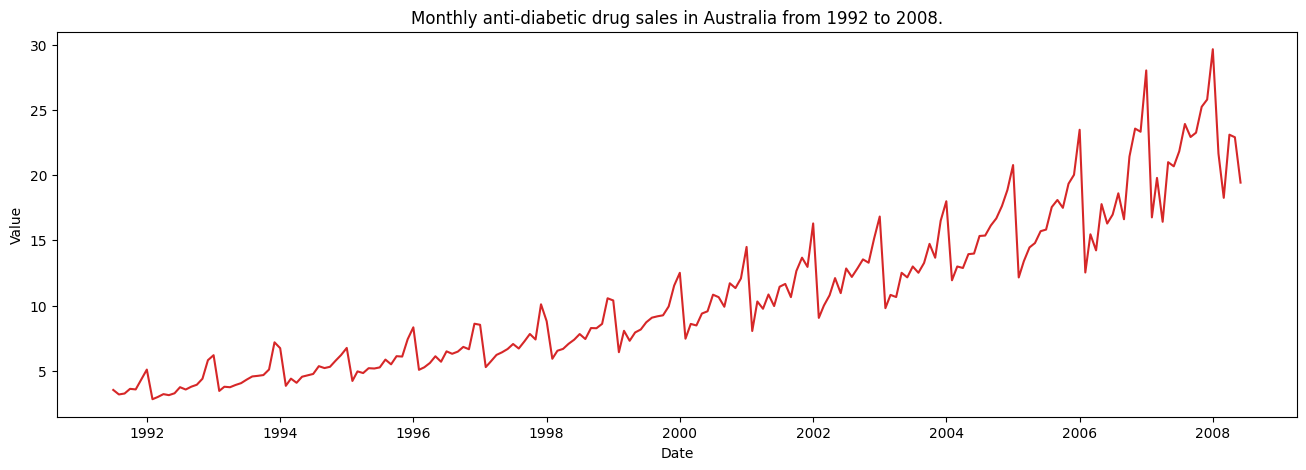

In [4]:
# Time series data source: fpp pacakge in R.
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
plot_df(df, x=df.index, y=df.value, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')    

Since all values are positive, you can show this on both sides of the Y axis to emphasize the growth.

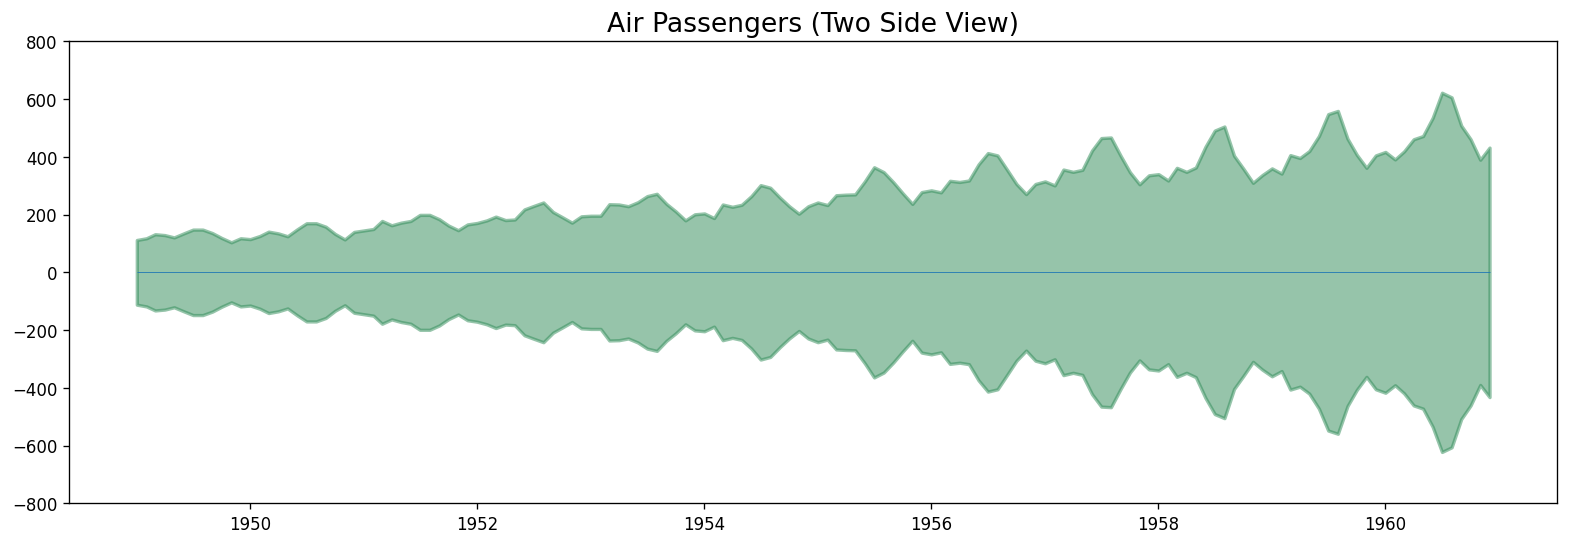

In [5]:
# Import data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/AirPassengers.csv', parse_dates=['date'])
x = df['date'].values
y1 = df['value'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Air Passengers (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df.date), xmax=np.max(df.date), linewidth=.5)
plt.show()

## __Seasonal Plot of a Time Series__

Very convenient to visualize if this seasons (years) pattern is conforming with the history. 

This is very useful for __Post-forecast analysis__ as well when you receive the actual data. 

__How?__

If your actual data is way different from what has happened in the past years, you will know that your forecasts are not to be blamed, but rather there could be some external factor that needs to be included in the forecast model. 

We will learn about these in detail when we learn forecasting techniques with time series in a future session.

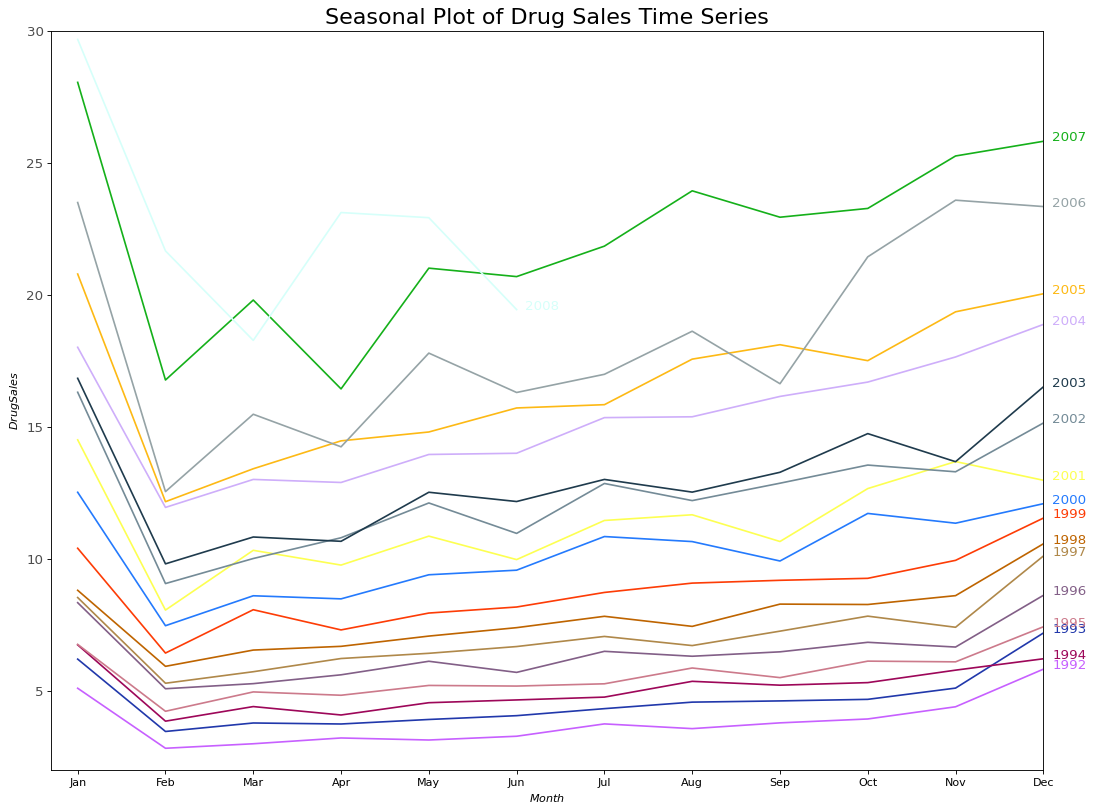

In [6]:
# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'value', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()

## __Boxplot of Month-wise (Seasonal) and Year-wise (trend) Distribution__

This an help to understand the growth in the pattern over long term and the deviation in pattern over shorter time periods.

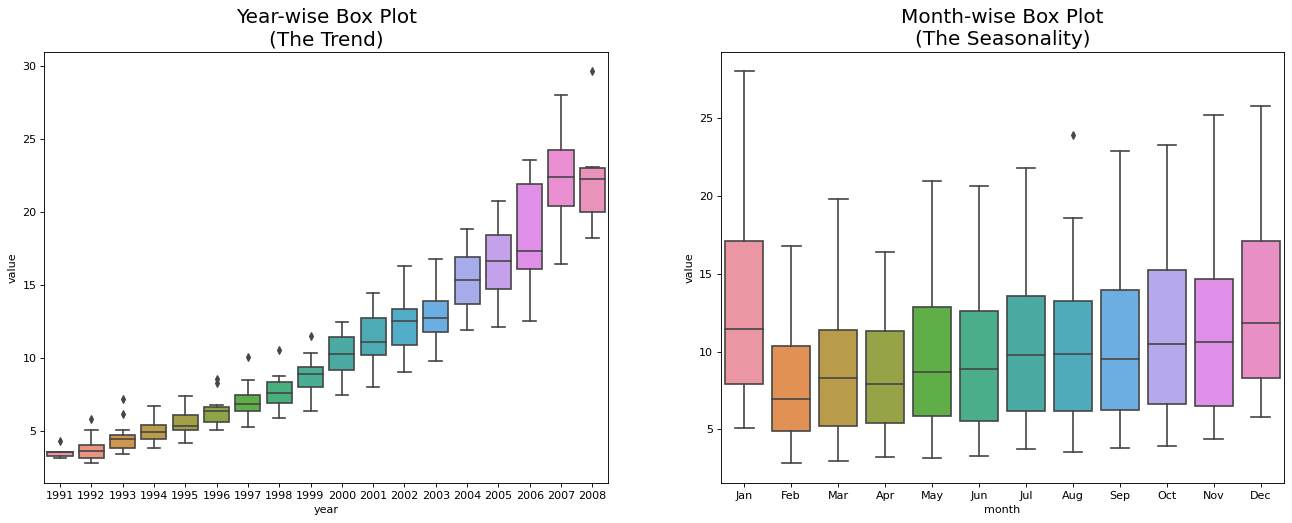

In [7]:
# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='value', data=df, ax=axes[0])
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

## __Patterns in a Time Series__

Any time series may be split into the following components: Base Level + Trend + Seasonality + Error

A trend is observed when there is an increasing or decreasing slope observed in the time series. Whereas seasonality is observed when there is a distinct repeated pattern observed between regular intervals due to seasonal factors. It could be because of the month of the year, the day of the month, weekdays or even time of the day.

However, It is not mandatory that all time series must have a trend and/or seasonality. A time series may not have a distinct trend but have a seasonality. The opposite can also be true.

So, a time series may be imagined as a combination of the trend, seasonality and the error terms.

<AxesSubplot:title={'center':'Trend and Seasonality'}, xlabel='date'>

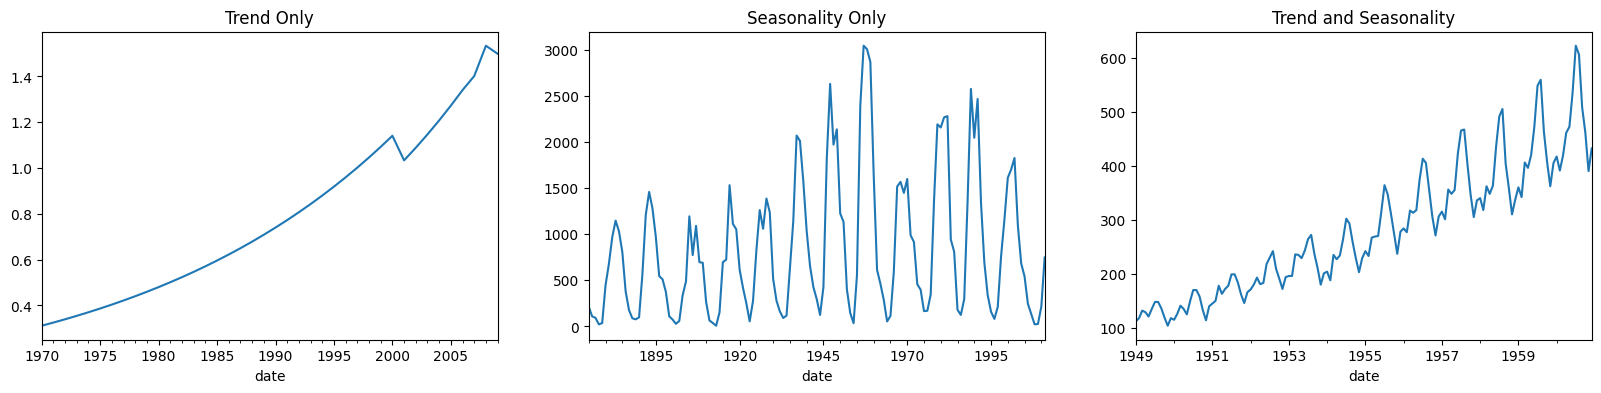

In [8]:
fig, axes = plt.subplots(1,3, figsize=(20,4), dpi=100)

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/guinearice.csv', parse_dates=['date'], index_col='date').plot(title='Trend Only', legend=False, ax=axes[0])

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv', parse_dates=['date'], index_col='date').plot(title='Seasonality Only', legend=False, ax=axes[1])

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/AirPassengers.csv', parse_dates=['date'], index_col='date').plot(title='Trend and Seasonality', legend=False, ax=axes[2])

## __What is Cyclic Pattern vs Seasonal Pattern and how to differentiate between them?__

Another aspect to consider is the cyclic behaviour. It happens when the rise and fall pattern in the series does not happen in fixed calendar-based intervals. Care should be taken to not confuse ‘cyclic’ effect with ‘seasonal’ effect.

So, How to diffentiate between a ‘cyclic’ vs ‘seasonal’ pattern?

If the patterns are not of fixed calendar based frequencies, then it is cyclic. Because, unlike the seasonality, cyclic effects are typically influenced by the business and other socio-economic factors.

## __How to decompose a time series into its components?__

Depending on the nature of the trend and seasonality, a time series can be modeled as an additive or multiplicative, wherein, each observation in the series can be expressed as either a sum or a product of the components:

__Additive time series:__

Value = Base Level + Trend + Seasonality + Error

__Multiplicative Time Series:__

Value = Base Level x Trend x Seasonality x Error

In [9]:
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
print("statsmodels version:", statsmodels.__version__)

statsmodels version: 0.13.5


__Import the data__

----------------


Text(0.5, 0.98, 'Additive Decompose')

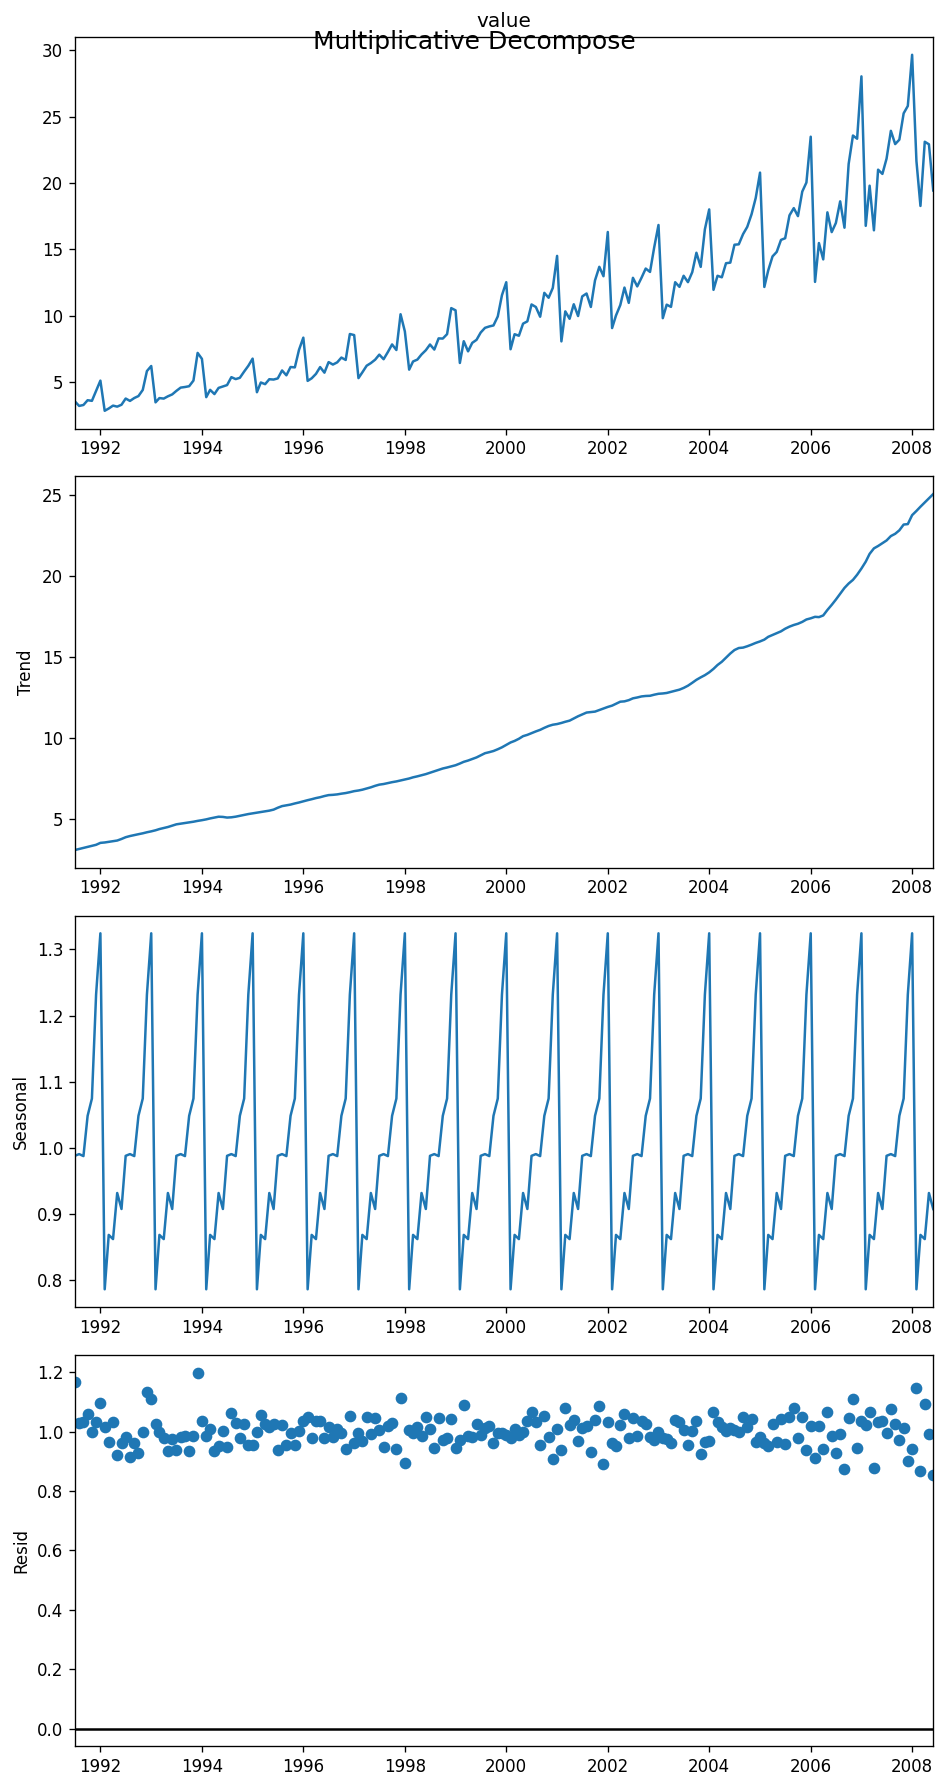

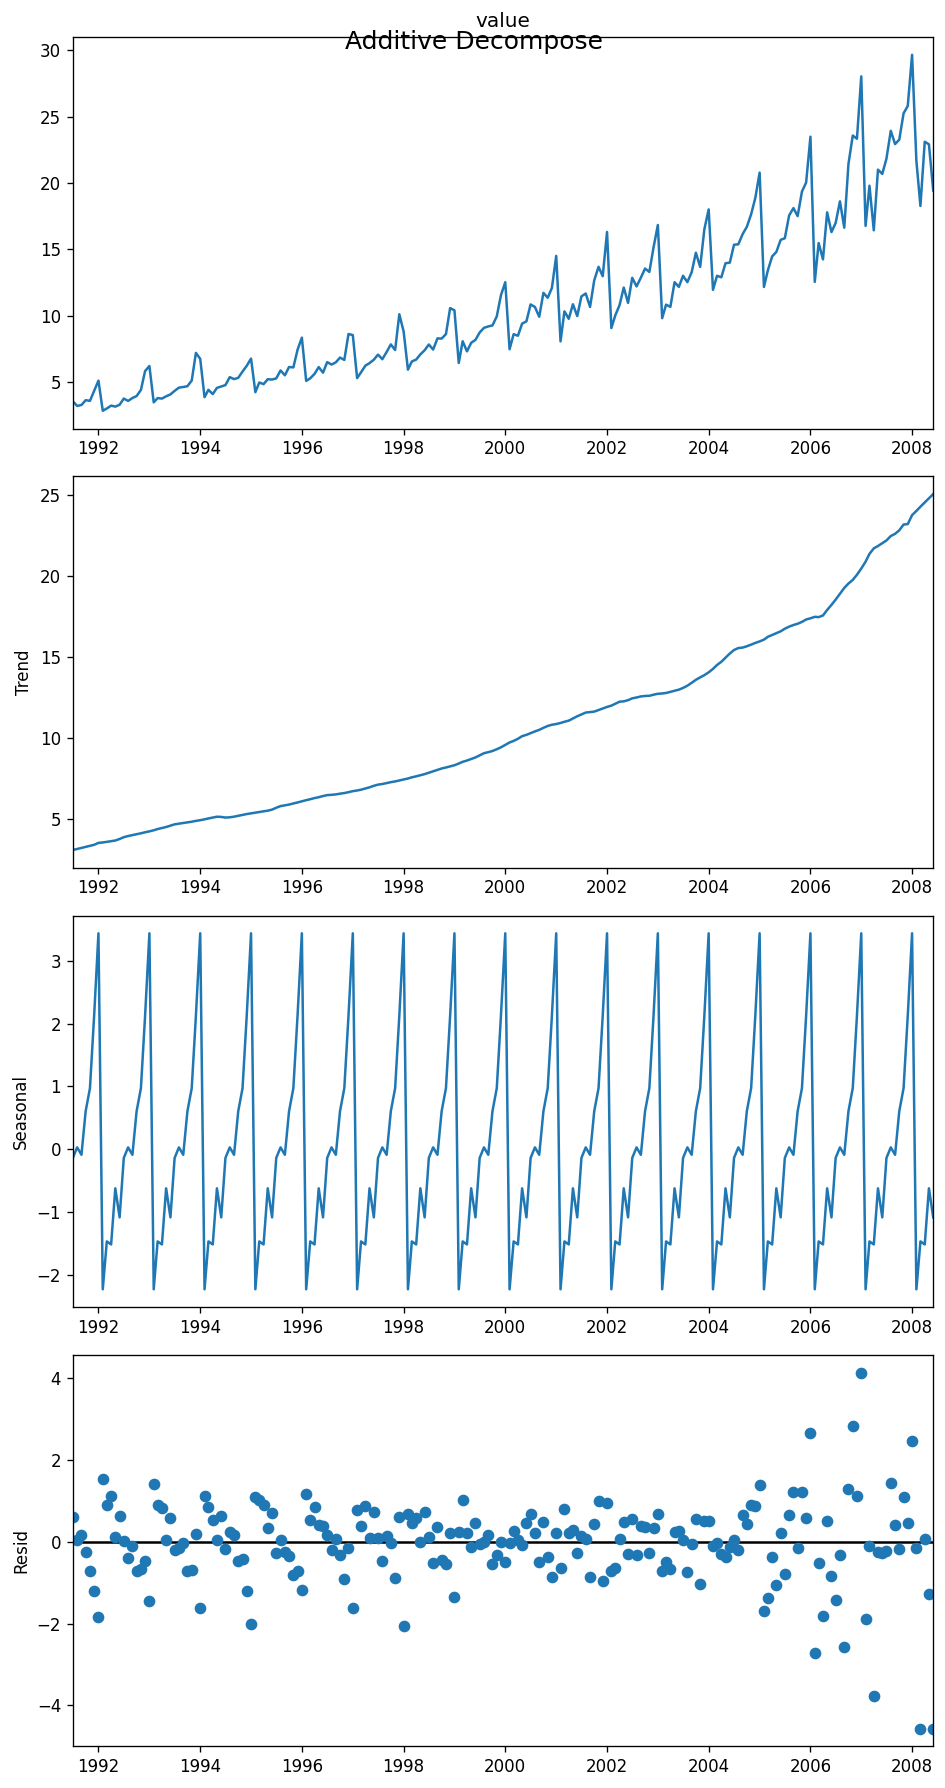

In [10]:
# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (8,15)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=15)
print("----------------")
result_add.plot().suptitle('Additive Decompose', fontsize=15)
# plt.show()

__Extract the components__

In [11]:
# Extract the Components ----
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

,seas,trend,resid,actual_values
date,,,,
1991-07-01,0.987845,3.060085,1.166629,3.526591
1991-08-01,0.990481,3.124765,1.027745,3.180891
1991-09-01,0.987476,3.189445,1.032615,3.252221
1991-10-01,1.048329,3.254125,1.058513,3.611003
1991-11-01,1.074527,3.318805,0.999923,3.565869


## __Stationary and Non-Stationary Time Series__

Stationarity is a property of a time series. A stationary series is one where the values of the series is not a function of time.

That is, the statistical properties of the series like mean, variance and autocorrelation are constant over time. Autocorrelation of the series is nothing but the correlation of the series with its previous values, more on this coming up.

A stationary time series id devoid of seasonal effects as well.

So how to identify if a series is stationary or not? Let’s plot some examples to make it clear:

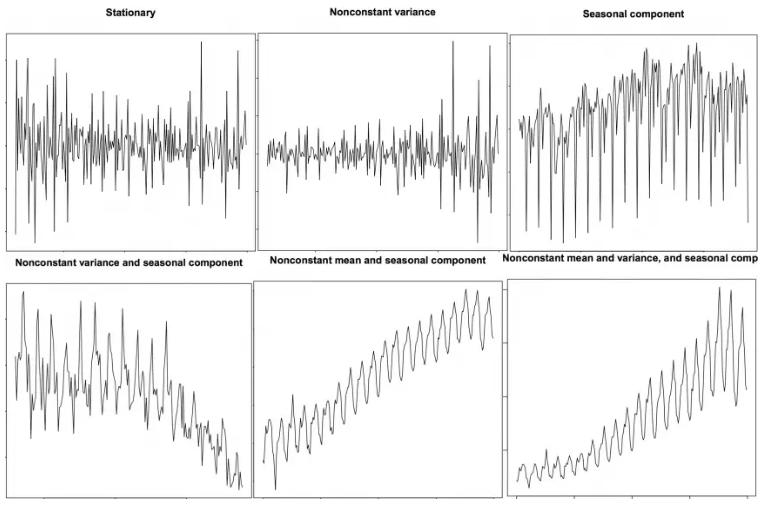

## __How to make a time series stationary?__

You can make series stationary by:

Differencing the Series (once or more)
Take the log of the series
Take the nth root of the series
Combination of the above
The most common and convenient method to stationarize the series is by differencing the series at least once until it becomes approximately stationary.

So what is differencing?

If Y_t is the value at time ‘t’, then the first difference of Y = Yt – Yt-1. In simpler terms, differencing the series is nothing but subtracting the next value by the current value.

If the first difference doesn’t make a series stationary, you can go for the second differencing. And so on.

For example, consider the following series: [1, 5, 2, 12, 20]

First differencing gives: [5-1, 2-5, 12-2, 20-12] = [4, -3, 10, 8]

Second differencing gives: [-3-4, -10-3, 8-10] = [-7, -13, -2]

## __Why make a non-stationary series stationary before forecasting?__

Forecasting a stationary series is relatively easy and the forecasts are more reliable.

An important reason is, autoregressive forecasting models are essentially linear regression models that utilize the lag(s) of the series itself as predictors.

We know that linear regression works best if the predictors (X variables) are not correlated against each other. So, stationarizing the series solves this problem since it removes any persistent autocorrelation, thereby making the predictors(lags of the series) in the forecasting models nearly independent.

Now that we’ve established that stationarizing the series important, how do you check if a given series is stationary or not?

## __How to test for stationarity?__

Use either Augmented Dickey Fuller Test or the KPSS Test. 

KPSS test can detect stationarity in presence of Trend. 

KPSS short for - Kwiatkowski-Phillips-Schmidt-Shin

In [12]:
from statsmodels.tsa.stattools import adfuller, kpss
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])

# ADF Test
result = adfuller(df.value.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(df.value.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: 3.1451856893067385
p-value: 1.0
Critial Values:
   1%, -3.465620397124192
Critial Values:
   5%, -2.8770397560752436
Critial Values:
   10%, -2.5750324547306476

KPSS Statistic: 2.013126
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


C:\Users\Akash\anaconda3\envs\mlenv2\lib\site-packages\statsmodels\tsa\stattools.py:2019: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


## __What is the difference between white noise and a stationary series?__

Like a stationary series, the white noise is also not a function of time, that is its mean and variance does not change over time. But the difference is, the white noise is completely random with a mean of 0.

In white noise there is no pattern whatsoever. If you consider the sound signals in an FM radio as a time series, the blank sound you hear between the channels is white noise.

Mathematically, a sequence of completely random numbers with mean zero is a white noise.

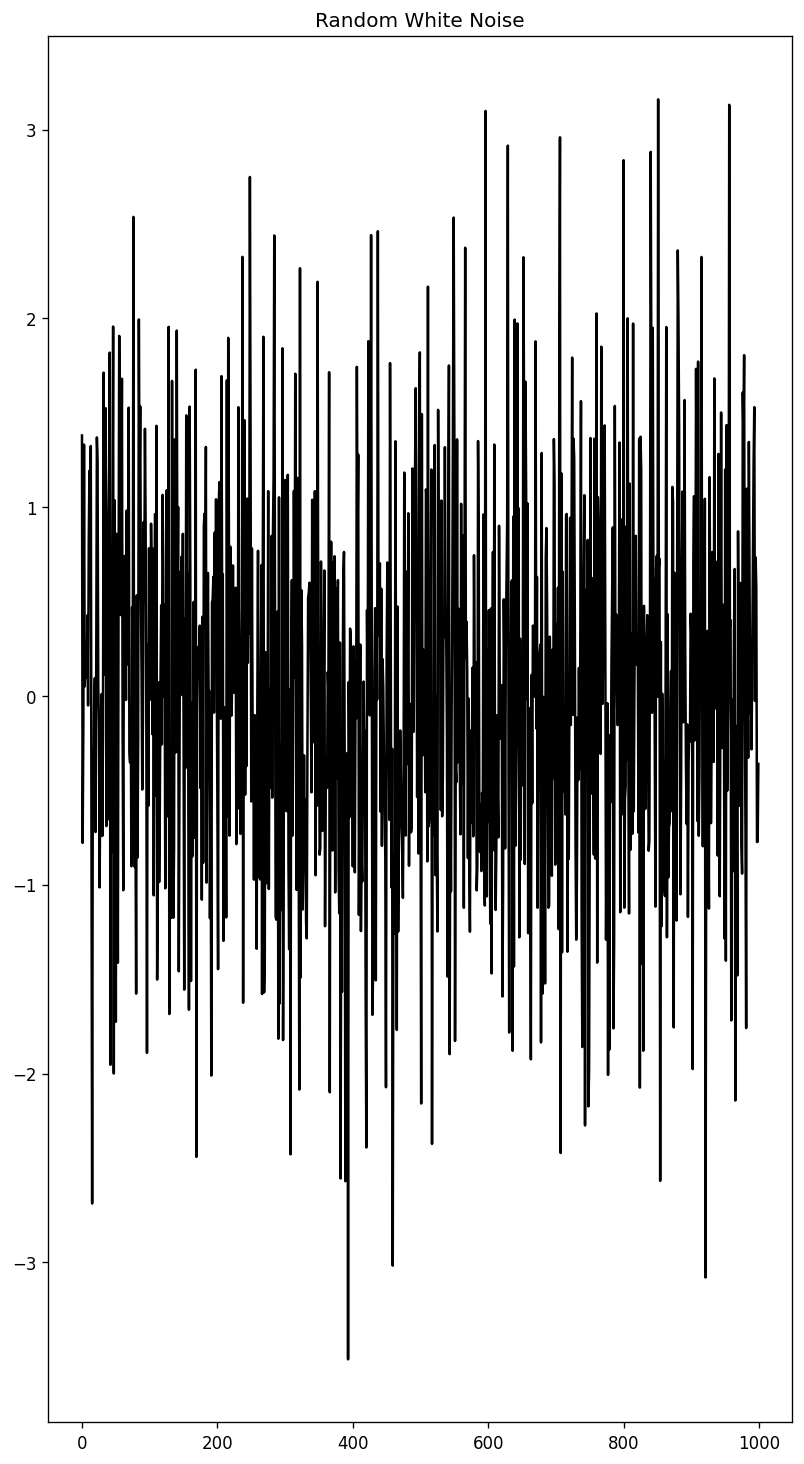

In [13]:
randvals = np.random.randn(1000)
pd.Series(randvals).plot(title='Random White Noise', color='k');

## __How to Detrend a Time Series?__

Text(0.5, 1.0, 'Drug Sales detrended by subtracting the least squares fit')

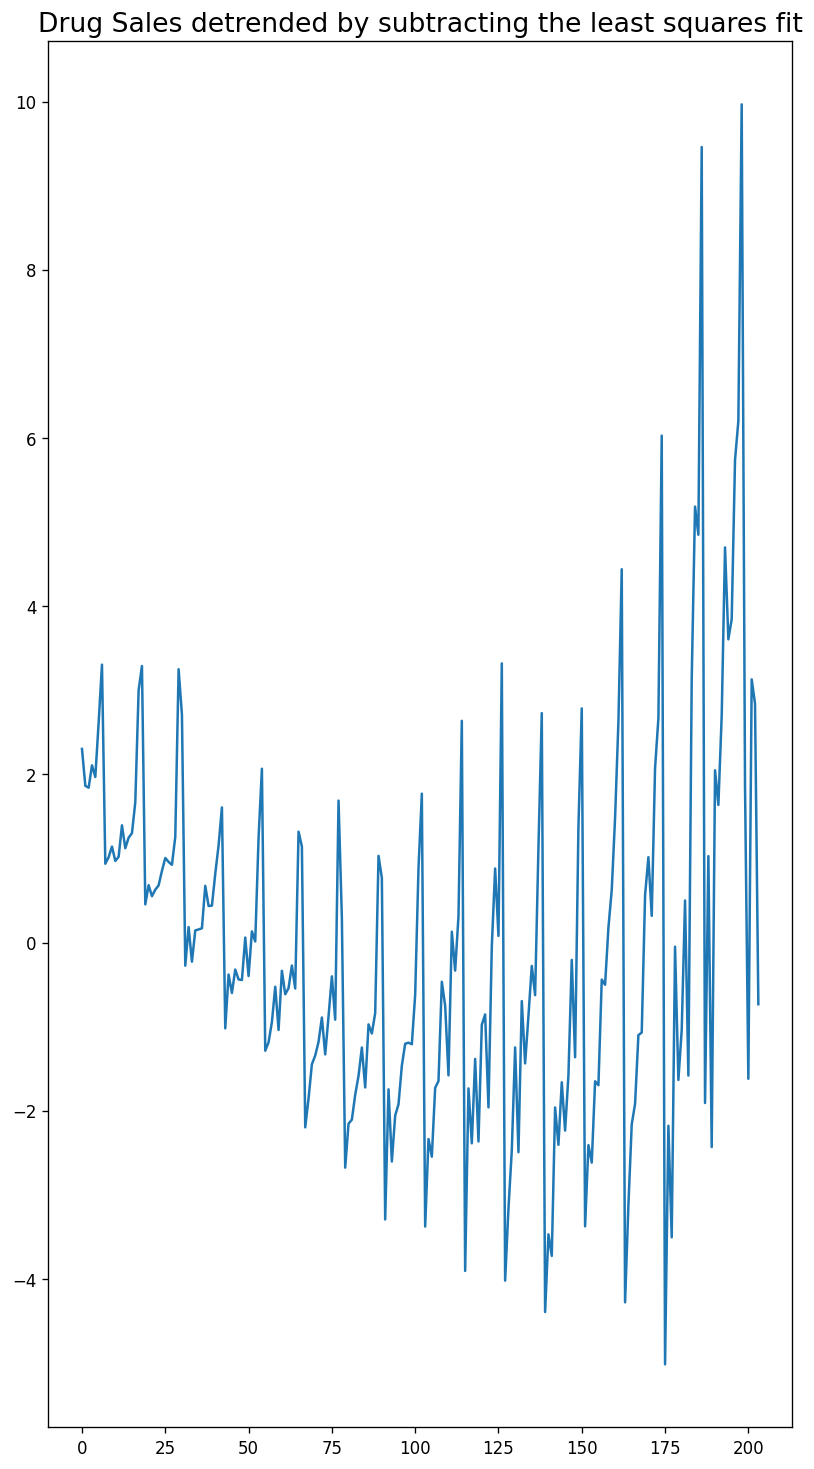

In [14]:
# Using scipy: Subtract the line of best fit
from scipy import signal
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
detrended = signal.detrend(df.value.values)
plt.plot(detrended)
plt.title('Drug Sales detrended by subtracting the least squares fit', fontsize=16)

__Using Statsmodels: Subtracting the Trend Component__

Text(0.5, 1.0, 'Drug Sales detrended by subtracting the trend component')

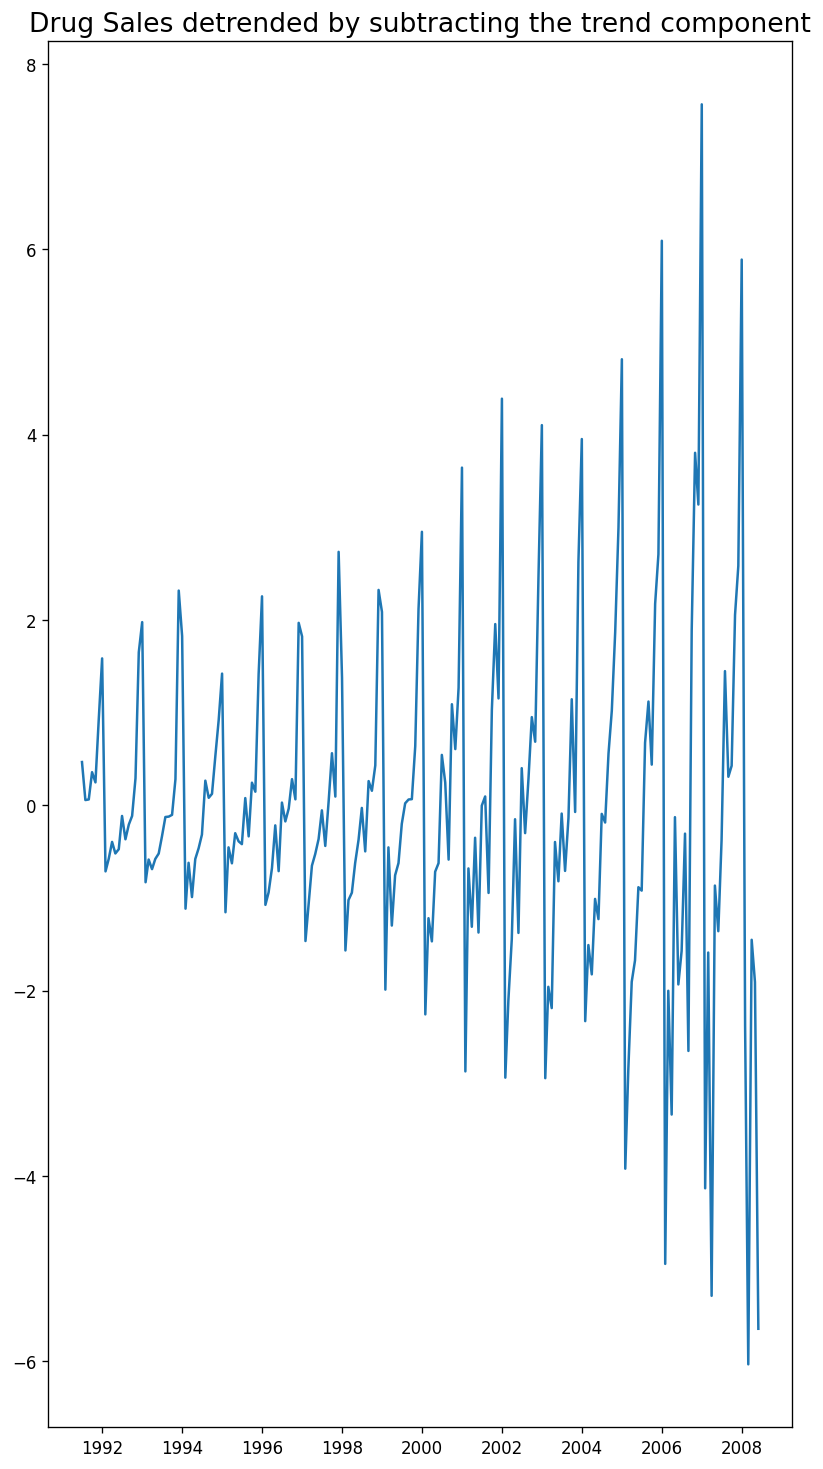

In [15]:

# Using statmodels: Subtracting the Trend Component.
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')
detrended = df.value.values - result_mul.trend
plt.plot(detrended)
plt.title('Drug Sales detrended by subtracting the trend component', fontsize=16)

## __How to deseasonalize a time series?__

There are multiple approaches to deseasonalize a time series as well. Below are a few:

1. Take a moving average with length as the seasonal window. This will smoothen in series in the process.

2. Seasonal difference the series (subtract the value of previous season from the current value)

3. Divide the series by the seasonal index obtained from STL decomposition

[]

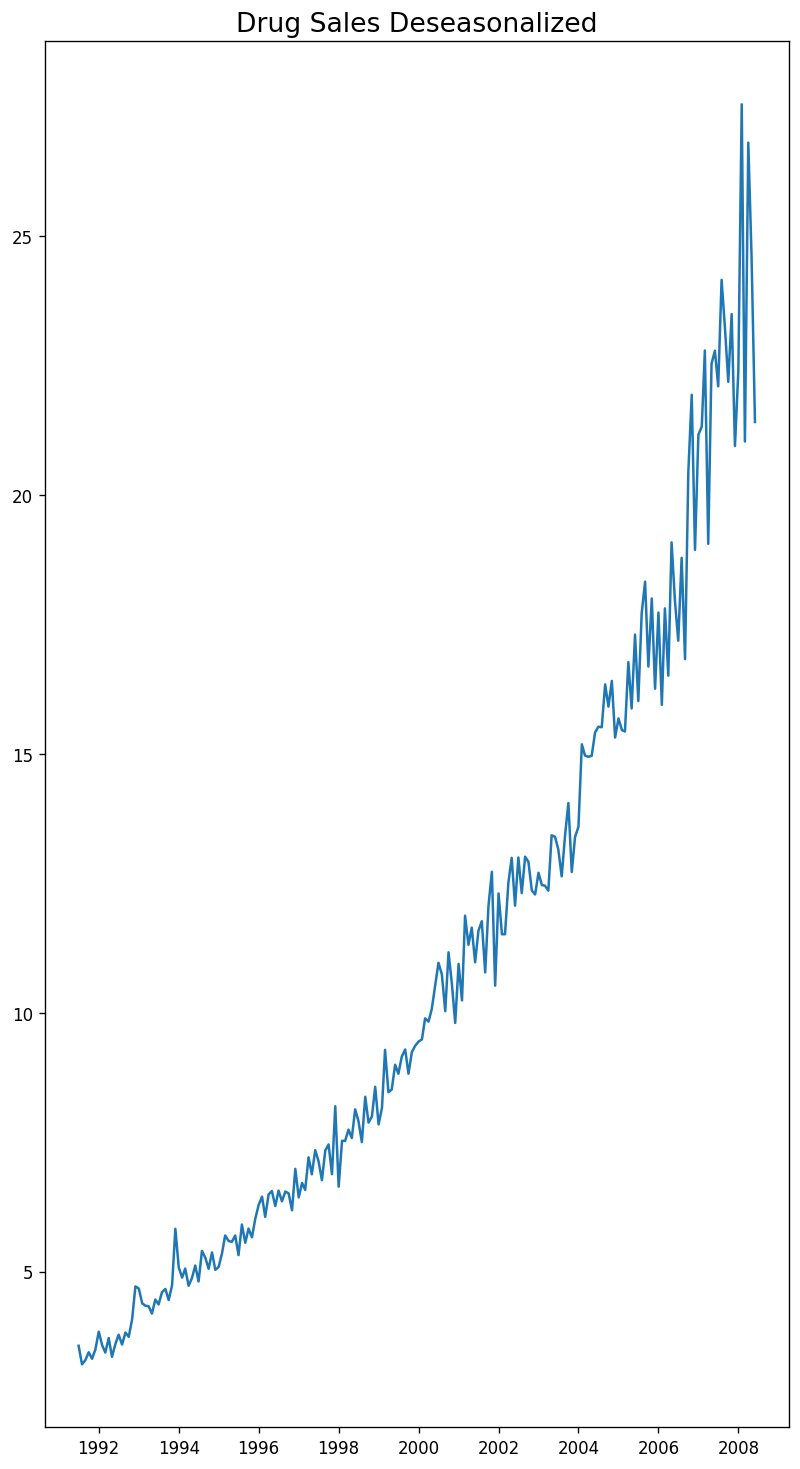

In [16]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Time Series Decomposition
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# Deseasonalize
deseasonalized = df.value.values / result_mul.seasonal

# Plot
plt.plot(deseasonalized)
plt.title('Drug Sales Deseasonalized', fontsize=16)
plt.plot()

## __Testing for Seasonality via ACF Plot__

The common way is to plot the series and check for repeatable patterns in fixed time intervals. So, the types of seasonality is determined by the clock or the calendar:

- Hour of day
- Day of month
- Weekly
- Monthly
- Yearly

A more definitive way is using the ACF plot.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

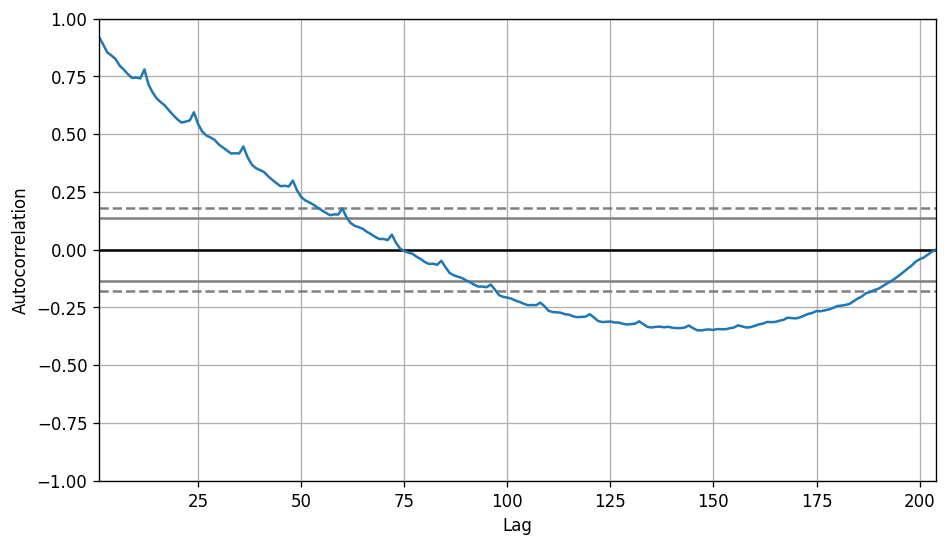

In [17]:
from pandas.plotting import autocorrelation_plot
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')

# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(df.value.tolist())

## __How to treat missing values in a time series?__

1. Backward Fill
2. Linear Interpolation
3. Quadratic interpolation
4. Mean of nearest neighbors
5. Mean of seasonal couterparts


<AxesSubplot:title={'center':'Seasonal Mean (MSE: 0.78)'}, xlabel='date'>

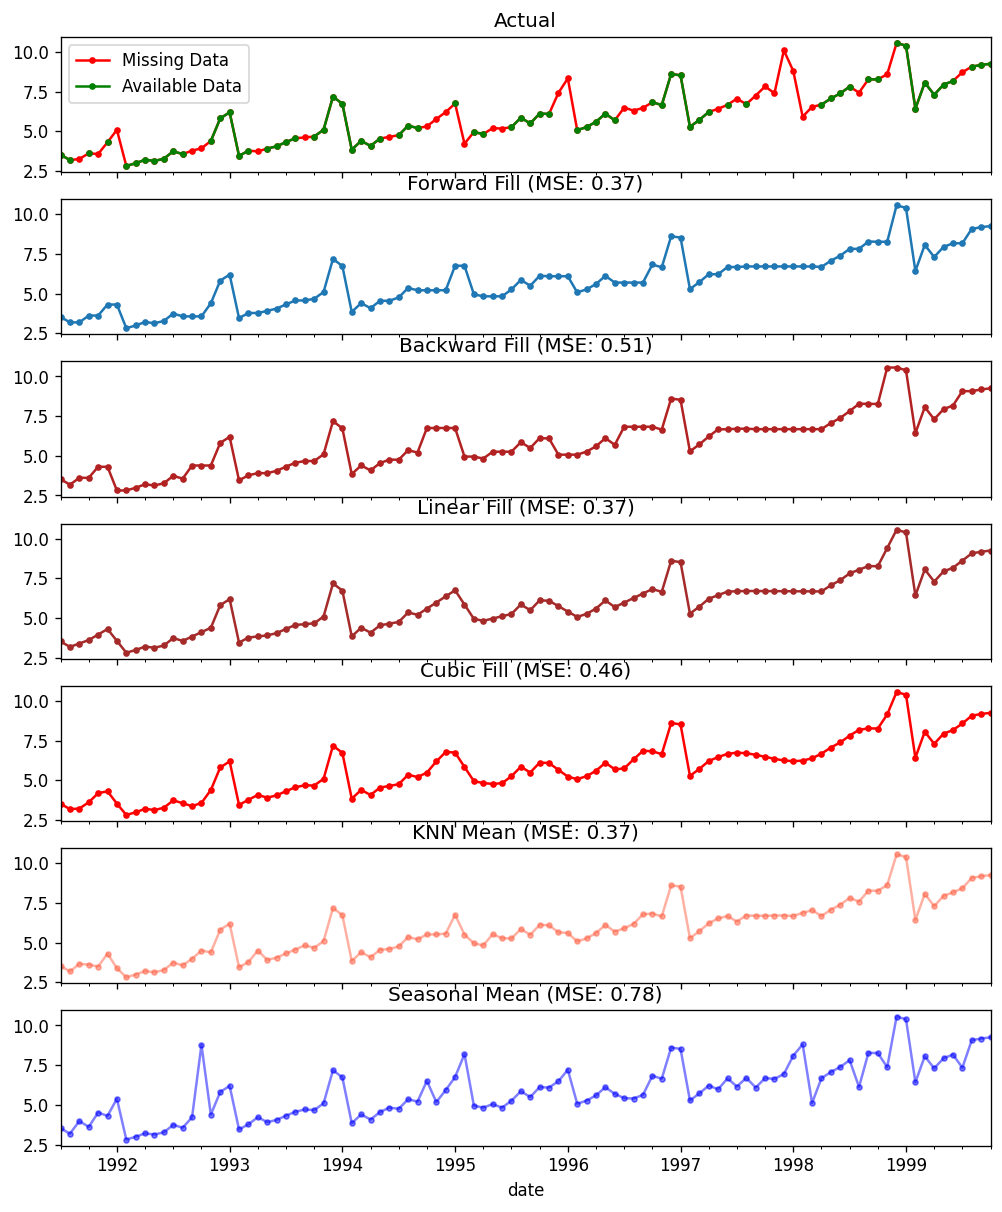

In [18]:
# # Generate dataset
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error
df_orig = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date').head(100)
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10_missings.csv', parse_dates=['date'], index_col='date')

fig, axes = plt.subplots(7, 1, sharex=True, figsize=(10, 12))
plt.rcParams.update({'xtick.bottom' : False})

## 1. Actual -------------------------------
df_orig.plot(title='Actual', ax=axes[0], label='Actual', color='red', style=".-")
df.plot(title='Actual', ax=axes[0], label='Actual', color='green', style=".-")
axes[0].legend(["Missing Data", "Available Data"])

## 2. Forward Fill --------------------------
df_ffill = df.ffill()
error = np.round(mean_squared_error(df_orig['value'], df_ffill['value']), 2)
df_ffill['value'].plot(title='Forward Fill (MSE: ' + str(error) +")", ax=axes[1], label='Forward Fill', style=".-")

## 3. Backward Fill -------------------------
df_bfill = df.bfill()
error = np.round(mean_squared_error(df_orig['value'], df_bfill['value']), 2)
df_bfill['value'].plot(title="Backward Fill (MSE: " + str(error) +")", ax=axes[2], label='Back Fill', color='firebrick', style=".-")

## 4. Linear Interpolation ------------------
df['rownum'] = np.arange(df.shape[0])
df_nona = df.dropna(subset = ['value'])
f = interp1d(df_nona['rownum'], df_nona['value'])
df['linear_fill'] = f(df['rownum'])
error = np.round(mean_squared_error(df_orig['value'], df['linear_fill']), 2)
df['linear_fill'].plot(title="Linear Fill (MSE: " + str(error) +")", ax=axes[3], label='Cubic Fill', color='brown', style=".-")

## 5. Cubic Interpolation --------------------
f2 = interp1d(df_nona['rownum'], df_nona['value'], kind='cubic')
df['cubic_fill'] = f2(df['rownum'])
error = np.round(mean_squared_error(df_orig['value'], df['cubic_fill']), 2)
df['cubic_fill'].plot(title="Cubic Fill (MSE: " + str(error) +")", ax=axes[4], label='Cubic Fill', color='red', style=".-")

# Interpolation References:
# https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html
# https://docs.scipy.org/doc/scipy/reference/interpolate.html

## 6. Mean of 'n' Nearest Past Neighbors ------
def knn_mean(ts, n):
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):
            n_by_2 = np.ceil(n/2)
            lower = np.max([0, int(i-n_by_2)])
            upper = np.min([len(ts)+1, int(i+n_by_2)])
            ts_near = np.concatenate([ts[lower:i], ts[i:upper]])
            out[i] = np.nanmean(ts_near)
    return out

df['knn_mean'] = knn_mean(df.value.values, 8)
error = np.round(mean_squared_error(df_orig['value'], df['knn_mean']), 2)
df['knn_mean'].plot(title="KNN Mean (MSE: " + str(error) +")", ax=axes[5], label='KNN Mean', color='tomato', alpha=0.5, style=".-")

## 7. Seasonal Mean ----------------------------
def seasonal_mean(ts, n, lr=0.7):
    """
    Compute the mean of corresponding seasonal periods
    ts: 1D array-like of the time series
    n: Seasonal window length of the time series
    """
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):
            ts_seas = ts[i-1::-n]  # previous seasons only
            if np.isnan(np.nanmean(ts_seas)):
                ts_seas = np.concatenate([ts[i-1::-n], ts[i::n]])  # previous and forward
            out[i] = np.nanmean(ts_seas) * lr
    return out

df['seasonal_mean'] = seasonal_mean(df.value, n=12, lr=1.25)
error = np.round(mean_squared_error(df_orig['value'], df['seasonal_mean']), 2)
df['seasonal_mean'].plot(title="Seasonal Mean (MSE: " + str(error) +")", ax=axes[6], label='Seasonal Mean', color='blue', alpha=0.5, style=".-")

## __What is autocorrelation and partial autocorrelation functions?__

Autocorrelation is simply the correlation of a series with its own lags. If a series is significantly autocorrelated, that means, the previous values of the series (lags) may be helpful in predicting the current value.

Partial Autocorrelation also conveys similar information but it conveys the pure correlation of a series and its lag, excluding the correlation contributions from the intermediate lags.

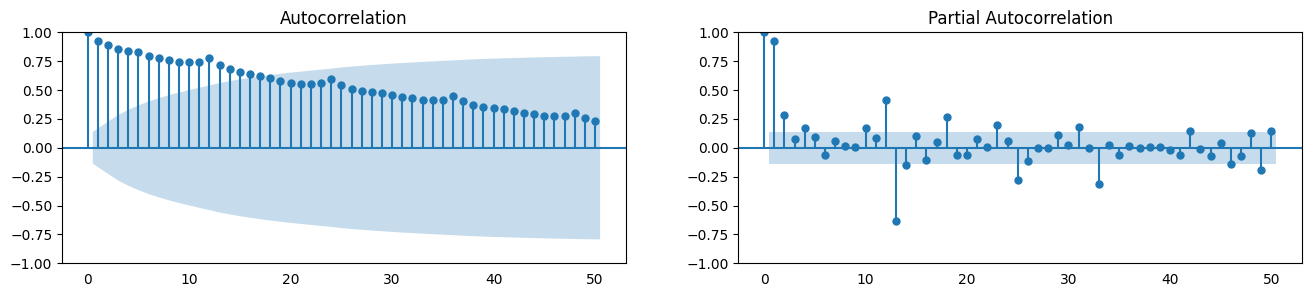

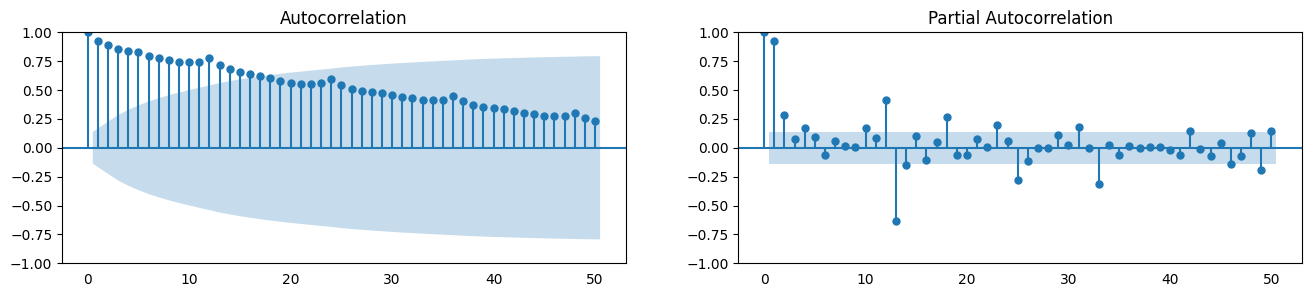

In [19]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')

# Calculate ACF and PACF upto 50 lags
# acf_50 = acf(df.value, nlags=50)
# pacf_50 = pacf(df.value, nlags=50)

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df.value.tolist(), lags=50, ax=axes[0])
plot_pacf(df.value.tolist(), lags=50, ax=axes[1])

__How to compute PACF?__

## __Lag Plots__

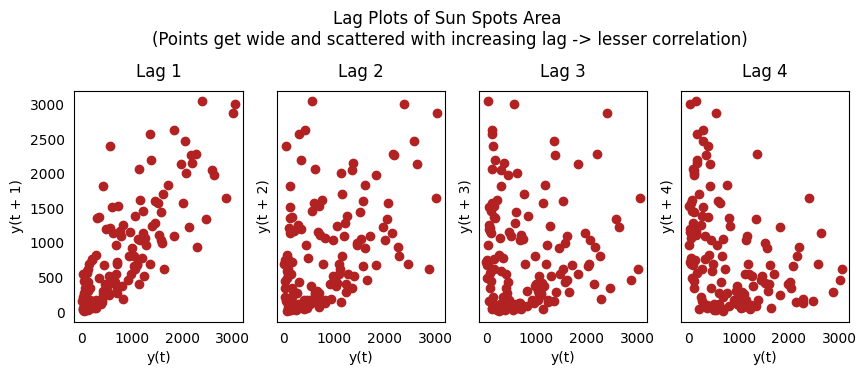

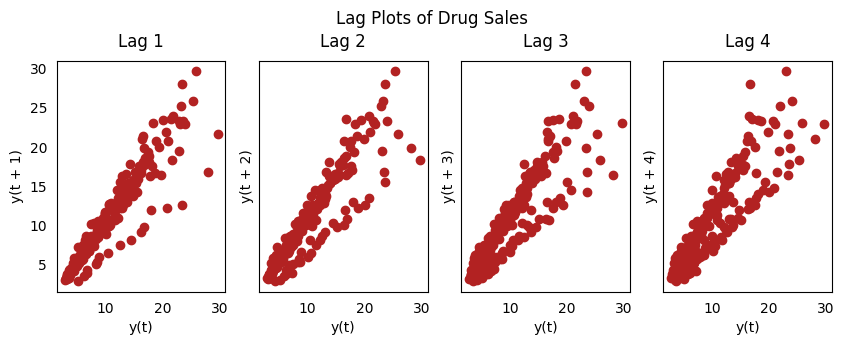

In [20]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Import
ss = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv')
a10 = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(ss.value, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Sun Spots Area \n(Points get wide and scattered with increasing lag -> lesser correlation)\n', y=1.15)    

fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(a10.value, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Drug Sales', y=1.05)    
plt.show()

## __How to Smoothen a Time Series?__

Smoothening of a time series may be useful to:

1. Reduce the effect of noise in a signal get a fair approximation of the noise-filtered series.
2. The smoothed version of series can be used as a feature to explain the original series itself.
3. Visualize the underlying trend better

So how to smoothen a series? Let’s discuss the following methods:

- Take a moving average
- Do a LOESS smoothing (Localized Regression)


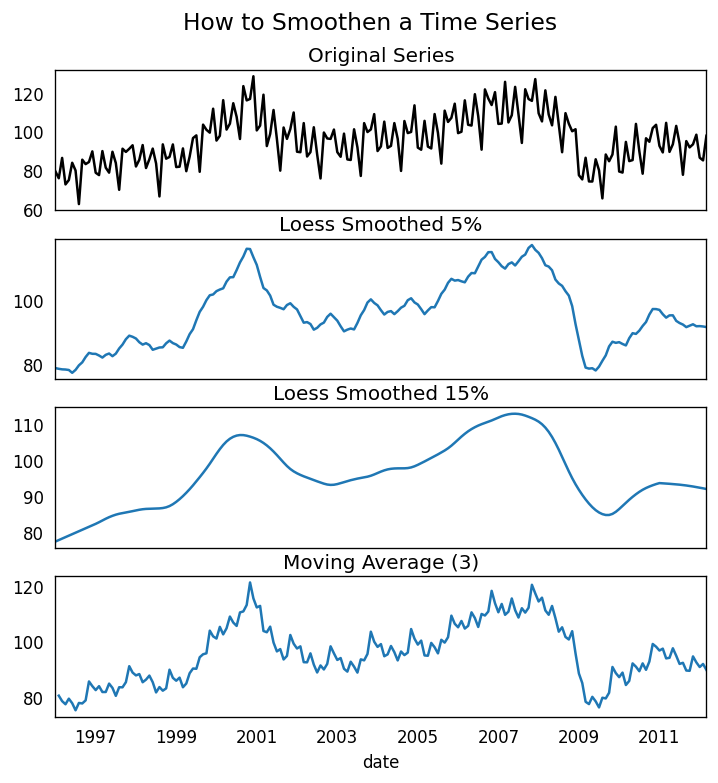

In [21]:
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})

# Import
df_orig = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/elecequip.csv', parse_dates=['date'], index_col='date')

# 1. Moving Average
df_ma = df_orig.value.rolling(3, center=True, closed='both').mean()

# 2. Loess Smoothing (5% and 15%)
df_loess_5 = pd.DataFrame(lowess(df_orig.value, np.arange(len(df_orig.value)), frac=0.05)[:, 1], index=df_orig.index, columns=['value'])
df_loess_15 = pd.DataFrame(lowess(df_orig.value, np.arange(len(df_orig.value)), frac=0.15)[:, 1], index=df_orig.index, columns=['value'])

# Plot
fig, axes = plt.subplots(4,1, figsize=(7, 7), sharex=True, dpi=120)
df_orig['value'].plot(ax=axes[0], color='k', title='Original Series')
df_loess_5['value'].plot(ax=axes[1], title='Loess Smoothed 5%')
df_loess_15['value'].plot(ax=axes[2], title='Loess Smoothed 15%')
df_ma.plot(ax=axes[3], title='Moving Average (3)')
fig.suptitle('How to Smoothen a Time Series', y=0.95, fontsize=14)
plt.show()

## __How to use Granger Causality test to know if one time series is helpful in forecasting another?__

Granger causality test is used to determine if one time series will be useful to forecast another.

__How does Granger causality test work?__

It is based on the idea that if X causes Y, then the forecast of Y based on previous values of Y AND the previous values of X should outperform the forecast of Y based on previous values of Y alone.

So, understand that Granger causality should not be used to test if a lag of Y causes Y. Instead, it is generally used on exogenous (not Y lag) variables only.

It is nicely implemented in the statsmodel package.

It accepts a 2D array with 2 columns as the main argument. The values are in the first column and the predictor (X) is in the second column.

The Null hypothesis is: the series in the second column, does not Granger cause the series in the first. If the P-Values are less than a significance level (0.05) then you reject the null hypothesis and conclude that the said lag of X is indeed useful.

The second argument maxlag says till how many lags of Y should be included in the test.

Apply this after making the time series stationary.

In [22]:
from statsmodels.tsa.stattools import grangercausalitytests
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
df['month'] = df.date.dt.month

In [23]:
# create lag of y
df[['value_lag1']] = df[['value']].diff()

In [24]:
grangercausalitytests(df[['value_lag1', 'month']].dropna(), maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=117.7100, p=0.0000  , df_denom=199, df_num=1
ssr based chi2 test:   chi2=119.4846, p=0.0000  , df=1
likelihood ratio test: chi2=93.8657 , p=0.0000  , df=1
parameter F test:         F=117.7100, p=0.0000  , df_denom=199, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=164.0021, p=0.0000  , df_denom=196, df_num=2
ssr based chi2 test:   chi2=336.3716, p=0.0000  , df=2
likelihood ratio test: chi2=197.6604, p=0.0000  , df=2
parameter F test:         F=164.0021, p=0.0000  , df_denom=196, df_num=2


{1: ({'ssr_ftest': (117.71003631699527, 7.644369556491557e-22, 199.0, 1),
   'ssr_chi2test': (119.48455947755298, 8.203139425636974e-28, 1),
   'lrtest': (93.86572736018377, 3.3767060751694415e-22, 1),
   'params_ftest': (117.71003631699537, 7.644369556491419e-22, 199.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (164.002081841608, 1.400524411125632e-42, 196.0, 2),
   'ssr_chi2test': (336.37161683840014, 9.074683126573537e-74, 2),
   'lrtest': (197.6603791748778, 1.1983785218975422e-43, 2),
   'params_ftest': (164.0020818416081, 1.4005244111255913e-42, 196.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

Since, the month of the year seem to affect the value of series, it can be considered as a evidence for seasonality.

__Assignment__

1. Does Month cause seasonal impact on AirPassengers series?
